# The Fourier Transform

The number of phenomena in the world that can be described using waveforms—functions of time, space or some other variable is immense. Through the Fourier tranform, all waveforms can be expressed as the sum of simple sinusoids.  By decomposing a signal into simple components, we can view  waveforms in an entirely new domain—the frequency domain.


<img src = "https://github.com/BeaverWorksMedlytics2020/Data_Public/raw/master/Images/Week2/time_freq_domain.png">


<img src = "https://github.com/BeaverWorksMedlytics2020/Data_Public/raw/master/Images/Week2/fourier_transform_fig.png">

The Fourier transform is like a mathematical prism.

<img src = "https://github.com/BeaverWorksMedlytics2020/Data_Public/raw/master/Images/Week2/prism.png">



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib

%matplotlib inline
matplotlib.rcParams.update({'font.size': 16,'figure.figsize':(10,6)})

## Complex Numbers
Before we define Fourier Transform, let's briefly review complex numbers. Recall that imaginary number __i__ is defined as a square root of -1:


$$i^2 = -1$$

Also, recall the Euler's formula ([the proof uses Taylor series](https://www.youtube.com/watch?v=jcrQ3rPUYjc)):

$$e^{ix} = cos(x) + i\ sin(x)$$

*By the way, python uses $j$ instead of $i$. It handles computation with complex numbers with relative ease, though.*

In [ ]:
z1 = 1+2j
z1

(1+2j)

In [ ]:
np.exp(z1)

(-1.1312043837568135+2.4717266720048188j)

In [ ]:
np.exp(z1).real, np.exp(z1).imag

(-1.1312043837568135, 2.4717266720048188)

An imaginary number has a magnitude (amplitude) and angle (phase)


<img src = "https://github.com/BeaverWorksMedlytics2020/Data_Public/raw/master/Images/Week2/complex_plane.png">




In [ ]:
# magnitude and the angle of the complex number
mag = abs(z1)
ang = np.angle(z1)

print(mag, ang)

2.23606797749979 1.1071487177940904



## Fourier Transform Definition

The Fourier transform is a function that takes a signal in the time domain $s(t)$ and translates it into one in the frequency domain, $S(\omega)$.  The *inverse* Fourier Transform takes a signal in the frequency domain $S(\omega)$ and translates it into one in the time domain $s(t)$:

$$S(\omega) = \mathcal{F}[s(t)] = \int_{-\infty}^\infty s(t) e^{-i \omega t} dt$$
$$s(t) = \mathcal{F}^{-1}[S(\omega)] = \frac{1}{2\pi}\int_{-\infty}^\infty S(\omega) e^{i \omega t} d\omega$$


If you're interested in getting some intuition behind this math, you should check out this [pretty nifty video](https://www.youtube.com/watch?v=spUNpyF58BY).


For our purposes, we will just be using the discrete version.


## Discrete Fourier Transform (DFT) 
$$S(m) = \sum_{n=0}^{N-1} s(n) e^{-i 2 \pi m \left({\frac{n}{N}}\right) }$$

Where:

* $N$ is the total number of samples
* $s(n)$ is the $n^{th}$ sample for the time-domain function 
* $S(m)$ is the output of the DFT for the $m^{th}$ frequency .  (This frequency corresponds to sine waves that complete $m$ cycles over the full sampling interval--i.e. those that have a frequency of $\frac{m}{T_{sample}}$ hertz)


### What does the Fourier transform give us?

* The amplitudes of simple sine waves that comprise the input time-domain signal
* The phases (similar to starting position) of the sine waves that comprise the time-domain signal

### What sine wave frequencies are measured?

* Frequencies in the half-open interval $[0,\frac{N}{2 T_{sample}})$ Hz in steps of $\frac{1}{T_{sample}}$ Hz (Note: half-open just means it doesn't include the point $\frac{N}{2 T_{sample}}$ Hz)

* **Example**: If your sample rate is $100$ Hz, and you calculate a DFT of 200 samples ($T_{sample} = 2 \ sec$), the DFT will return the frequency components of the input signal for frequencies from $0$ to $49.5$ Hz in steps of $0.5$ Hz.

Here's an example signal that we'll be using for some examples below:

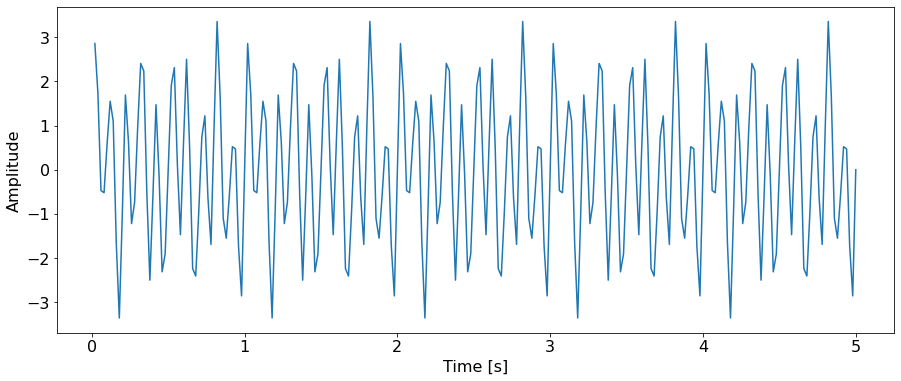

In [ ]:
num_sec = 5         # (sec) sampling period
f_samp = 50         # (Hz) samples per second

# Make a signal by combining three sinusoids
t = np.linspace(1/f_samp, num_sec, f_samp*num_sec)
s = (1.0 * np.sin(4  * 2 * np.pi * t)
   + 0.5 * np.sin(15 * 2 * np.pi * t)
   + 2.0 * np.sin(10 * 2 * np.pi * t))

# Plot that signal
plt.figure(figsize=(15,6))
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

### *Aside:*
The FFT outputs an array of length N corresponding to N/2 frequencies, and N/2 of their complex congugates.   

For real number inputs is $n$ the complex conjugate of $N - n$.  This is true for all numbers in the sequence.

Because the second half of the sequence gives us no new information we can already conclude that the half of the FT sequence is the output we need.

In [ ]:
# Look at the output of the fft
fft = np.fft.fft(s)  

for i in range(3):
    print("\nValue at index {}:\t{}".format(i, fft[i]),
          "\nValue at index {}:\t{}".format(fft.size - i, fft[-i]))


Value at index 0:	(-1.1368683772161603e-13+0j) 
Value at index 250:	(-1.1368683772161603e-13+0j)

Value at index 1:	(-5.087696875329725e-13-2.5970227654915974e-13j) 
Value at index 249:	(-5.073431601352242e-13+2.595615189098266e-13j)

Value at index 2:	(4.3925416473143653e-13+8.027968864830865e-14j) 
Value at index 248:	(4.392541647314366e-13-8.027968864830863e-14j)


## Inverse Fourier Transform (IFT)


Recall: 


#### Discrete Fourier Transform (DFT) 
$$S[m] = \sum_{n=0}^{N-1} s[n] e^{-i 2 \pi m \left({\frac{n}{N}}\right) }$$

#### Inverse Discrete  Fourier Transform (IDFT)
$$s[n]=\frac{1}{N} \sum_{m=0}^{N-1}S[m]e^{i2\pi m\left({\frac{n}{N}}\right) }$$


**Meaning**:

* $N$ is the total number of samples
* $s[n]$ is the $n^{th}$ sample in the time-domain 
* $S[m]$ is the $m^{th}$ sample in the frequency-domain 

In [ ]:
# Take the Fourier Transform
# Then take the Inverse Fourier Transform

fft = np.fft.fft(s)
s_recon = np.fft.ifft(fft)

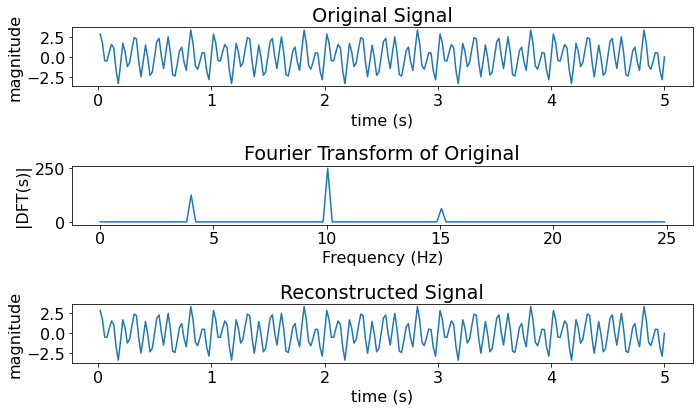

In [ ]:
# Plot it!

plt.figure()
plt.subplot(3,1,1)
plt.plot(t,s)
plt.title('Original Signal')
plt.xlabel('time (s)')
plt.ylabel('magnitude')

#plot dft (plot abs value to avoid plotting real/imag parts separately)

T_samp = t[-1]-t[0] #get length of full sampling interval
freq_vals = np.arange(0, (len(t)-1)/2, 1) / T_samp #get frequency values up to nyquist frequency
ampVals = np.abs(fft[:len(freq_vals)])

plt.subplot(3,1,2)
plt.plot(freq_vals, ampVals)
plt.title('Fourier Transform of Original')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|DFT(s)|')

plt.subplot(3,1,3)
plt.plot(t,s_recon.real)
plt.title('Reconstructed Signal')
plt.xlabel('time (s)')
plt.ylabel('magnitude')

plt.tight_layout()


### Yay!
We can decompose a signal into its component frequencies, and reconstruct it back to the time domain!

# Spectogram

A spectrogram is a visual representation of the spectrum of frequencies of sound or other signal as they vary with time. Spectrograms are sometimes called sonographs, voiceprints, or voicegrams.

This is a great representation because it captures both time and frequency information!

In [ ]:
# Grab a sample .wav file (audio file) for this notebook
os.system('wget https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/sounds/newt.wav')

--2021-07-13 15:33:17--  https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/sounds/newt.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99852 (98K) [audio/wav]
Saving to: ‘newt.wav’

     0K .......... .......... .......... .......... .......... 51% 24.3M 0s
    50K .......... .......... .......... .......... .......   100% 18.3M=0.005s

2021-07-13 15:33:17 (21.0 MB/s) - ‘newt.wav’ saved [99852/99852]



0

In [ ]:
from scipy import signal
import scipy.io.wavfile

(sample_rate, y_newt) = scipy.io.wavfile.read("./newt.wav")
y_newt=y_newt-y_newt.mean() #subtract mean signal to get rid of 0 Hz component

sample_freq, segment_time, spec_data = signal.spectrogram(y_newt,sample_rate)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  from ipykernel import kernelapp as app


Text(0, 0.5, '|DFT[s(t)]|')

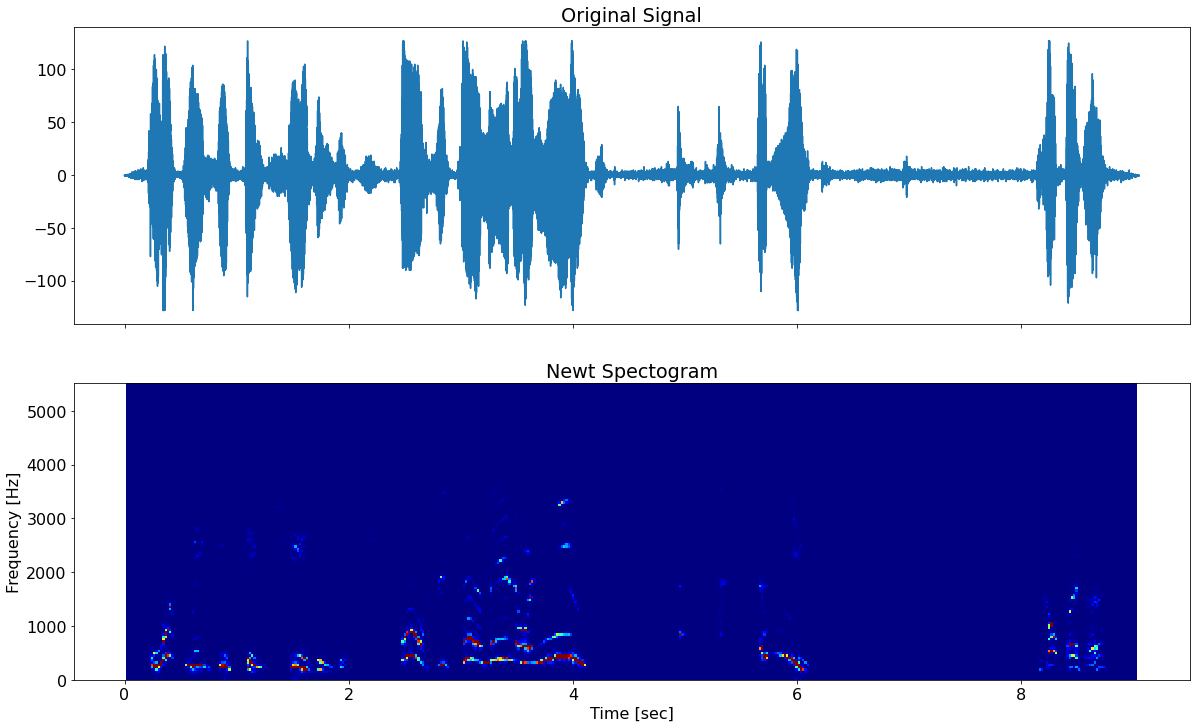

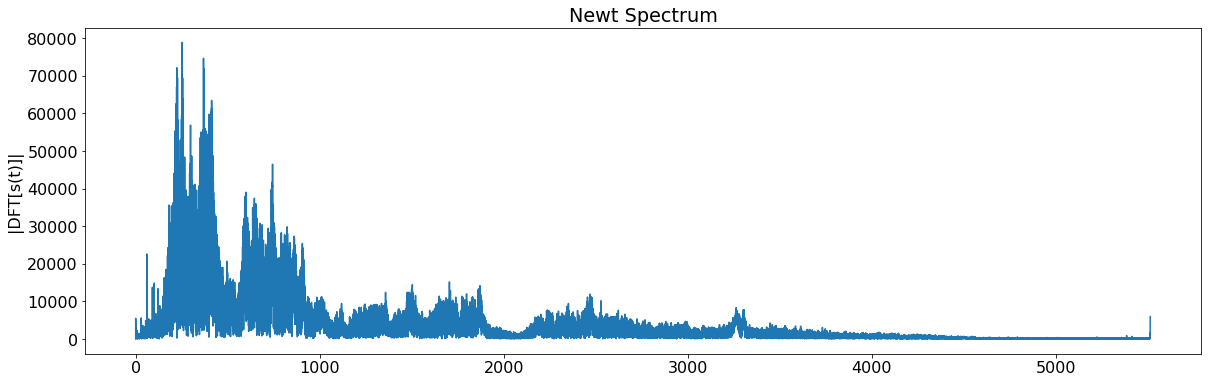

In [ ]:
# PLOT

t = np.arange(0, len(y_newt)/sample_rate, 1/sample_rate)
N = y_newt.size  
T = t[1]-t[0]

fft_newt=np.fft.fft(y_newt)


f, (ax1, ax2) = plt.subplots(2, 1, sharex='col', sharey='row',figsize=(20,12))

ax1.plot(t,y_newt)
ax1.set_title('Original Signal')

ax2.pcolormesh(segment_time, sample_freq, spec_data,cmap='jet',vmax=10)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Newt Spectogram")

plt.figure(figsize = (20,6))
plt.title("Newt Spectrum")
T_samp = t[-1]-t[0] #get length of full sampling interval in time domain
freq_vals = np.arange(0, (len(t)-1)/2, 1) / T_samp #get frequency bin values up to Nyquist frequency
amp_vals = np.abs(fft_newt[:len(freq_vals)]) #get amplitude values for all these frequency bins
plt.plot(freq_vals, amp_vals)
plt.ylabel('|DFT[s(t)]|')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3d82bae0-f509-4ec0-92dc-a9b1bbc77ba9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>